# **Group Members**

**MEMBER 1** \
MUHAMMAD ZAIN SHAHZAD\
SP21-BSCS-0078\
\
**MEMBER 2**\
AYUSH KUMAR MANDHAN\
SP21-BSCS-0074

#Step # 1
#**Setting the Research Goal**

Rossmann store over 3,000 drug in 7 European countrires. Rossmann store operations involve predicting daily sales to forecast figures for the upcoming six weeks. This forecasting is crucial for planning and allocating resources effectively. Several factors, such as promotions, competition, holidays, seasonality, and locality, contribute to the fluctuations in sales performance across Rossmann stores. The objective is to create a robust predictive model using historical sales data from 1,115 Rossmann stores. The aim is to accurately anticipate the "Sales" column in the test set, considering the dynamic and diverse conditions influencing store performance. It's noteworthy that certain stores in the dataset were temporarily closed for refurbishment, which adding complexity to the sales prediction task.

# **DATASET LINK**

https://www.kaggle.com/competitions/rossmann-store-sales

#website link

https://www.rossmann.de/de/

#Step # 2
#**Retrieving Data**

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import plotly.express as px
import pandas as pd
import ast
import math
import random
from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pickle

In [9]:
#Rosmann Data
sales_df =pd.read_csv('Rossmann Stores Data.csv', error_bad_lines=False)

# Store data
store_df =pd.read_csv('store.csv')

<ipython-input-9-21acef24e245>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  sales_df =pd.read_csv('Rossmann Stores Data.csv', error_bad_lines=False)
<ipython-input-9-21acef24e245>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_df =pd.read_csv('Rossmann Stores Data.csv', error_bad_lines=False)


In [10]:
# Dataset First Look
sales_df.head()
# a public holiday
#b easter holiday

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [11]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [12]:
sales_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [13]:
sales_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [14]:
# change state holiday value a,b,c is equal to 1 in later step
sales_df['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [15]:
# change datatype object into date format in later step
sales_df['Date'].unique()

array(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
       '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
       '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
       '2015-07-19', '2015-07-18', '2015-07-17', '2015-07-16',
       '2015-07-15', '2015-07-14', '2015-07-13', '2015-07-12',
       '2015-07-11', '2015-07-10', '2015-07-09', '2015-07-08',
       '2015-07-07', '2015-07-06', '2015-07-05', '2015-07-04',
       '2015-07-03', '2015-07-02', '2015-07-01', '2015-06-30',
       '2015-06-29', '2015-06-28', '2015-06-27', '2015-06-26',
       '2015-06-25', '2015-06-24', '2015-06-23', '2015-06-22',
       '2015-06-21', '2015-06-20', '2015-06-19', '2015-06-18',
       '2015-06-17', '2015-06-16', '2015-06-15', '2015-06-14',
       '2015-06-13', '2015-06-12', '2015-06-11', '2015-06-10',
       '2015-06-09', '2015-06-08', '2015-06-07', '2015-06-06',
       '2015-06-05', '2015-06-04', '2015-06-03', '2015-06-02',
       '2015-06-01', '2015-05-31', '2015-05-30', '2015-

In [16]:
sales_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [17]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [18]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

#Step # 3
#**Data Preparation**

In [19]:
sales_df.fillna(0, inplace=True)

In [20]:
sales_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [21]:
sales_df['SchoolHoliday'] .unique()
# Indicator

array([1, 0])

In [22]:
li = ["DayOfWeek" , "StateHoliday" , "SchoolHoliday"]

for i in li:
  print(i)
  print(sales_df[i].unique())
  print("-----------------------")


DayOfWeek
[5 4 3 2 1 7 6]
-----------------------
StateHoliday
['0' 'a' 'b' 'c' 0]
-----------------------
SchoolHoliday
[1 0]
-----------------------


In [23]:
store_df.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

In [24]:
store_df.fillna(0, inplace=True)

In [25]:
store_df.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [26]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1112,1113,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1113,1114,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [27]:
final1 = pd.merge(sales_df, store_df, on='Store', how='left')

In [28]:
final1

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [29]:
#Change data types object to int
final1.loc[final1['StateHoliday'] == '0', 'StateHoliday'] = 0 #none
final1.loc[final1['StateHoliday'] == 'a', 'StateHoliday'] = 1 #public holiday
final1.loc[final1['StateHoliday'] == 'b', 'StateHoliday'] = 2 #easter holiday
final1.loc[final1['StateHoliday'] == 'c', 'StateHoliday'] = 3 #christmas
#store the value with same column name i.e StateHoliday with function astype
final1['StateHoliday'] = final1['StateHoliday'].astype(int, copy=False)

In [30]:
# change Data Types object into int
final1.loc[final1['Assortment'] == 'a', 'Assortment'] = 0 #basic
final1.loc[final1['Assortment'] == 'b', 'Assortment'] = 1 #extra
final1.loc[final1['Assortment'] == 'c', 'Assortment'] = 2 #extended
#store the value with same column name i.e Assortment with function astype
final1['Assortment'] = final1['Assortment'].astype(int, copy=False)

In [31]:
# change Data Types object into int
final1.loc[final1['StoreType'] == 'a', 'StoreType'] = 0
final1.loc[final1['StoreType'] == 'b', 'StoreType'] = 1
final1.loc[final1['StoreType'] == 'c', 'StoreType'] = 2
final1.loc[final1['StoreType'] == 'd', 'StoreType'] = 3
#store the value with same column name i.e Assortment with function astype
final1['StoreType'] = final1['StoreType'].astype(int, copy=False)

In [32]:
print(final1[['StateHoliday', 'Assortment', 'StoreType']].nunique())

StateHoliday    4
Assortment      3
StoreType       4
dtype: int64


In [33]:
final1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  int64  
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  int64  
 10  Assortment                 1017209 non-null  int64  
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [34]:
final1["Sales"].value_counts()

0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
23806         1
24183         1
20651         1
25083         1
23303         1
Name: Sales, Length: 21734, dtype: int64

In [35]:
# Clean the Date column by removing extra double quotes
final1['Date'] = final1['Date'].str.replace('"', '')

# Try to infer the datetime format
final1['Date'] = pd.to_datetime(final1['Date'], errors='coerce')

# Display rows where the conversion failed
print(final1[final1['Date'].isnull()]['Date'])


Series([], Name: Date, dtype: datetime64[ns])


In [36]:
# code for changing format of date from object to datetime
final1['Date'] = pd.to_datetime(final1['Date'], format= '%Y-%m-%d')

In [37]:
# code for change object into date format
final1['CompetitionOpenSinceMonth'] = pd.DatetimeIndex(final1['Date']).month

In [38]:
# Convert specific columns to integers after handling NaN and inf
int_columns = ['Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
               'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
               'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear']

# Replace NaN and inf values with 0
final1[int_columns] = final1[int_columns].replace({np.nan: 0, np.inf: 0, -np.inf: 0}).astype(int)


In [39]:
final1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int64         
 10  Assortment                 1017209 non-null  int64         
 11  CompetitionDistance        1017209 no

In [40]:
final1

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,7,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,7,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,7,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,7,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,7,2015,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,1,1,0,0,1900,1,2014,1,31,2013,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,1,1,2,2,1880,1,2006,0,0,0,0
1017206,1113,2,2013-01-01,0,0,0,0,1,1,0,2,9260,1,0,0,0,0,0
1017207,1114,2,2013-01-01,0,0,0,0,1,1,0,2,870,1,0,0,0,0,0


In [41]:
final1 = pd.get_dummies(final1, columns=['PromoInterval'])

In [42]:
final1

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,1270,7,2008,0,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,570,7,2007,1,13,2010,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14130,7,2006,1,14,2011,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,620,7,2009,0,0,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,29910,7,2015,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,1,1,0,...,1900,1,2014,1,31,2013,0,0,1,0
1017205,1112,2,2013-01-01,0,0,0,0,1,1,2,...,1880,1,2006,0,0,0,1,0,0,0
1017206,1113,2,2013-01-01,0,0,0,0,1,1,0,...,9260,1,0,0,0,0,1,0,0,0
1017207,1114,2,2013-01-01,0,0,0,0,1,1,0,...,870,1,0,0,0,0,1,0,0,0


In [43]:
final1.describe().apply(lambda x: round(x, 2))

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
count,1017209.00,1017209.0,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.0,1017209.00,1017209.00,1017209.0,1017209.00,1017209.00,1017209.00
mean,558.43,4.0,5773.82,633.15,0.83,0.38,0.05,0.18,1.21,0.94,5415.98,5.85,1370.17,0.5,11.65,1007.01,0.5,0.12,0.29,0.10
std,321.91,2.0,3849.93,464.41,0.38,0.49,0.28,0.38,1.37,0.99,7710.25,3.33,935.36,0.5,15.32,1005.88,0.5,0.32,0.45,0.29
min,1.00,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00
25%,280.00,2.0,3727.00,405.00,1.00,0.00,0.00,0.00,0.00,0.00,700.00,3.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00
50%,558.00,4.0,5744.00,609.00,1.00,0.00,0.00,0.00,0.00,0.00,2320.00,6.00,2006.00,1.0,1.00,2009.00,0.0,0.00,0.00,0.00
75%,838.00,6.0,7856.00,837.00,1.00,1.00,0.00,0.00,3.00,2.00,6880.00,8.00,2011.00,1.0,22.00,2012.00,1.0,0.00,1.00,0.00
max,1115.00,7.0,41551.00,7388.00,1.00,1.00,3.00,1.00,3.00,2.00,75860.00,12.00,2015.00,1.0,50.00,2015.00,1.0,1.00,1.00,1.00


#Step # 4
#**Data Exploration**

**LINE CHART**

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since year')

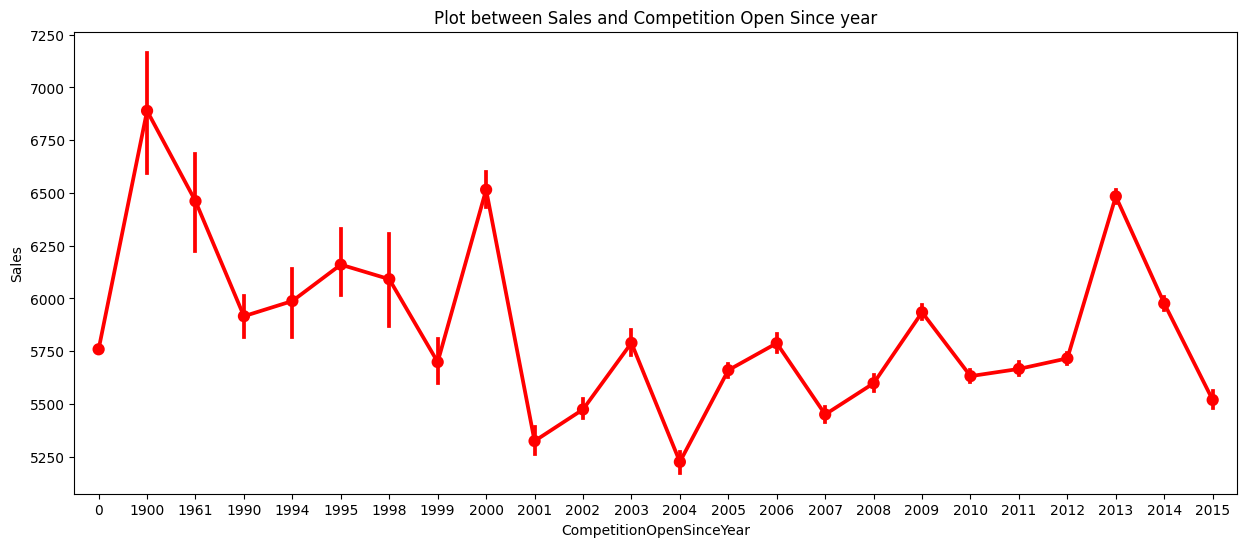

In [44]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=final1,color='Red')
sns.set_style("dark")
plt.title('Plot between Sales and Competition Open Since year')

Text(0.5, 1.0, 'Plot between Sales and Promo2SinceYear')

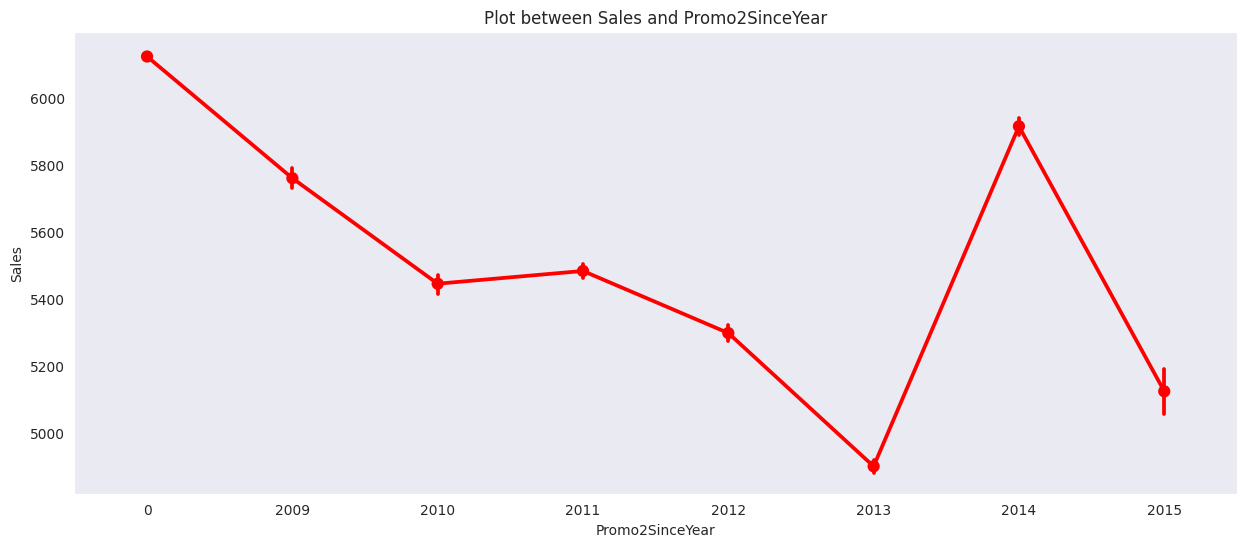

In [45]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'Promo2SinceYear', y= 'Sales', data=final1,color='Red')
sns.set_style("dark")
plt.title('Plot between Sales and Promo2SinceYear')

Text(0.5, 1.0, 'Plot between Sales and DayOfWeek')

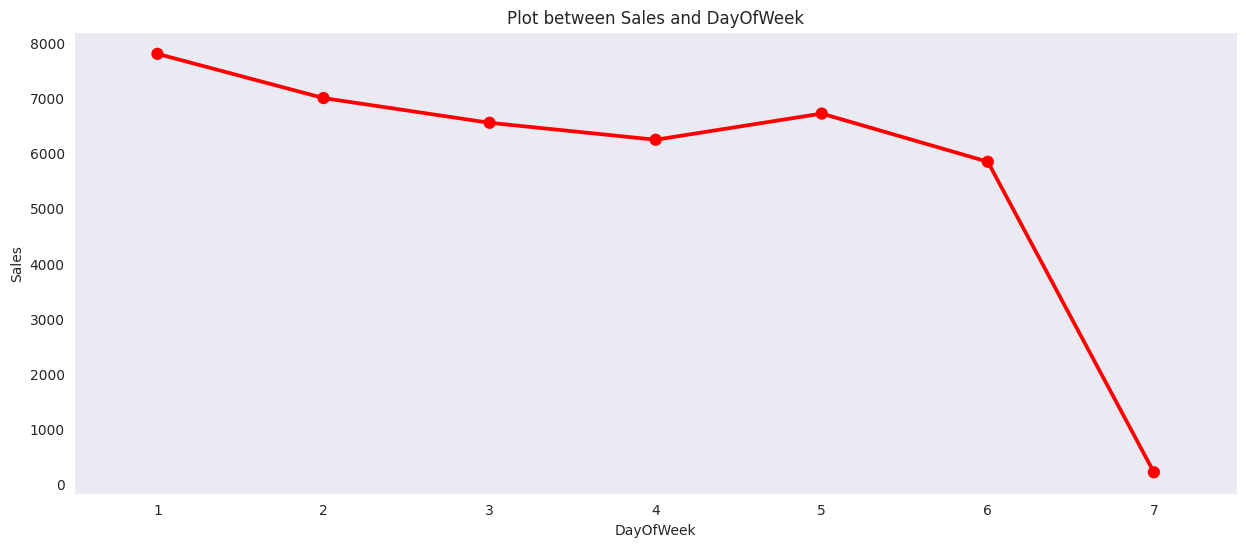

In [46]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'DayOfWeek', y= 'Sales', data=final1,color='Red')
sns.set_style("dark")
plt.title('Plot between Sales and DayOfWeek')

Text(0.5, 1.0, 'Plot between Sales and CompetitionOpenSinceMonth ')

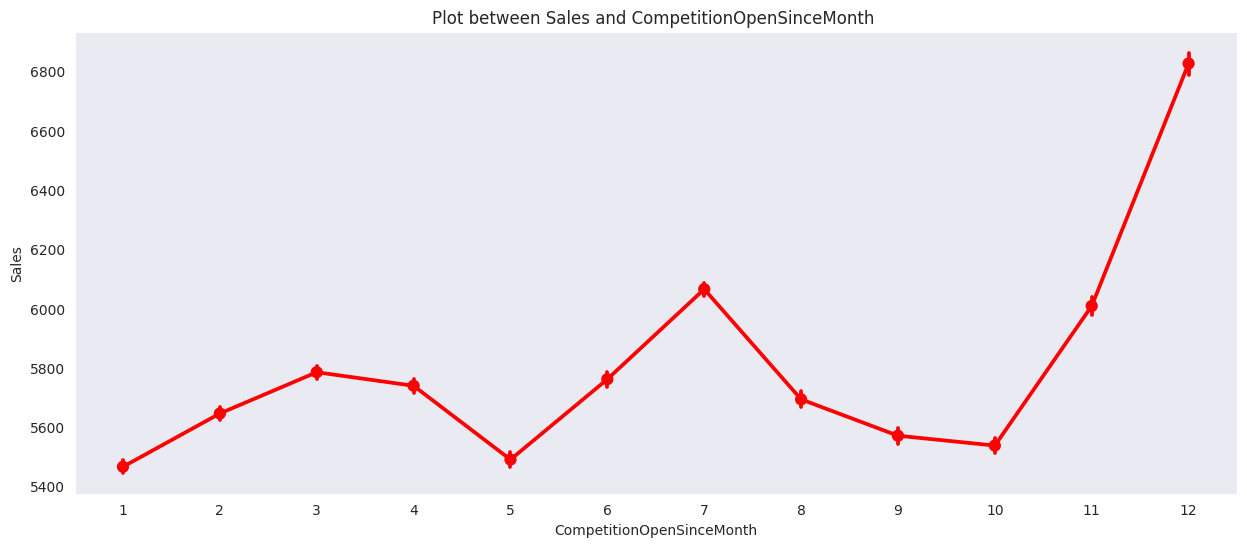

In [47]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceMonth', y= 'Sales', data=final1,color='Red')
sns.set_style("dark")
plt.title('Plot between Sales and CompetitionOpenSinceMonth ')

**BOX PLOT**

Text(0.5, 1.0, 'Boxplot For Sales Values')

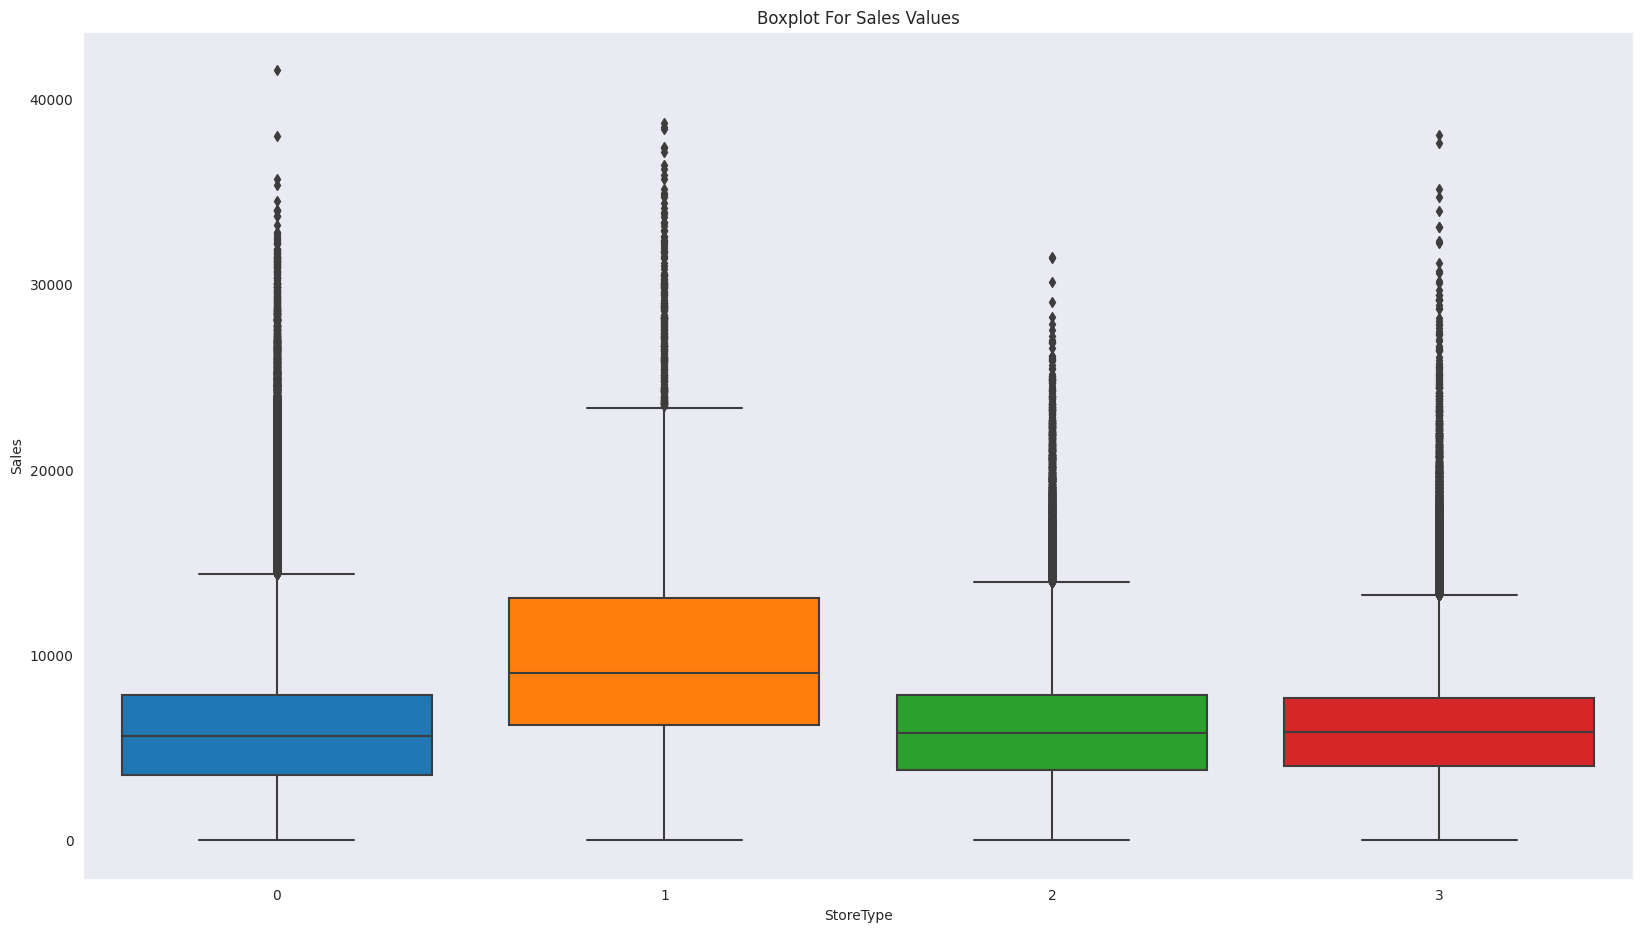

In [48]:
plt.figure(figsize=(20, 11))
plot_storetype_sales = sns.boxplot(x="StoreType", y="Sales", data=final1, saturation=1.5,width=0.8)
plt.title('Boxplot For Sales Values')

Text(0.5, 1.0, 'Boxplot For Sales Values on the basis of Assortment')

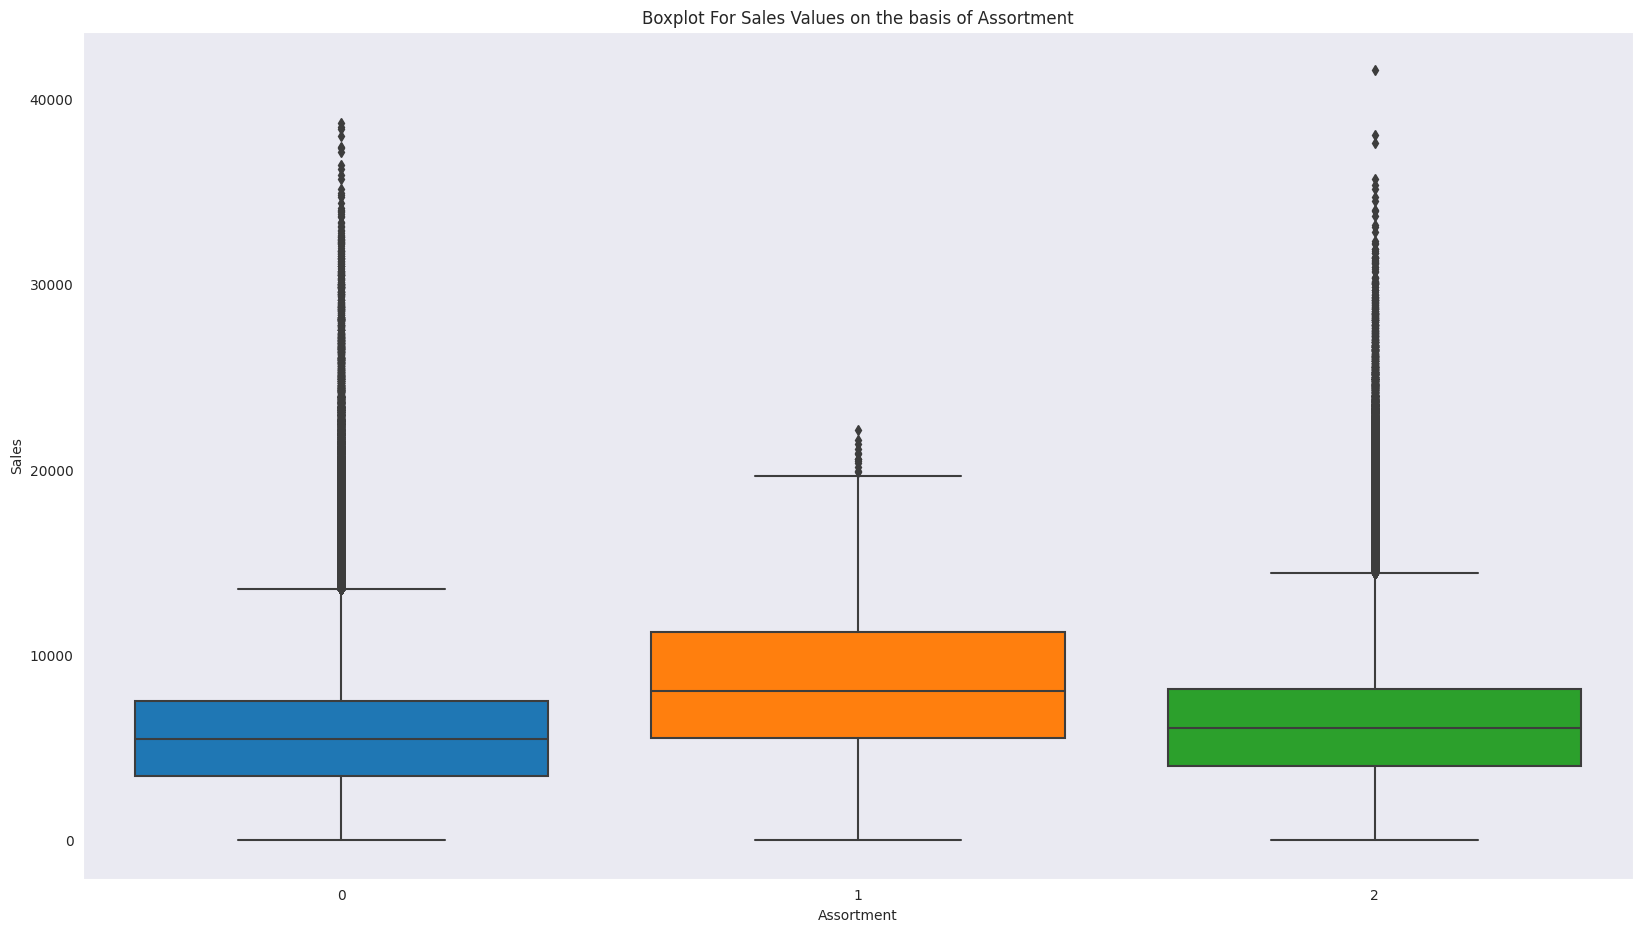

In [49]:
plt.figure(figsize=(20, 11))
plot_storetype_sales = sns.boxplot(x="Assortment", y="Sales", data=final1, saturation=1.5,width=0.8)
plt.title('Boxplot For Sales Values on the basis of Assortment')

Text(0.5, 1.0, 'Store Daily Open Countplot')

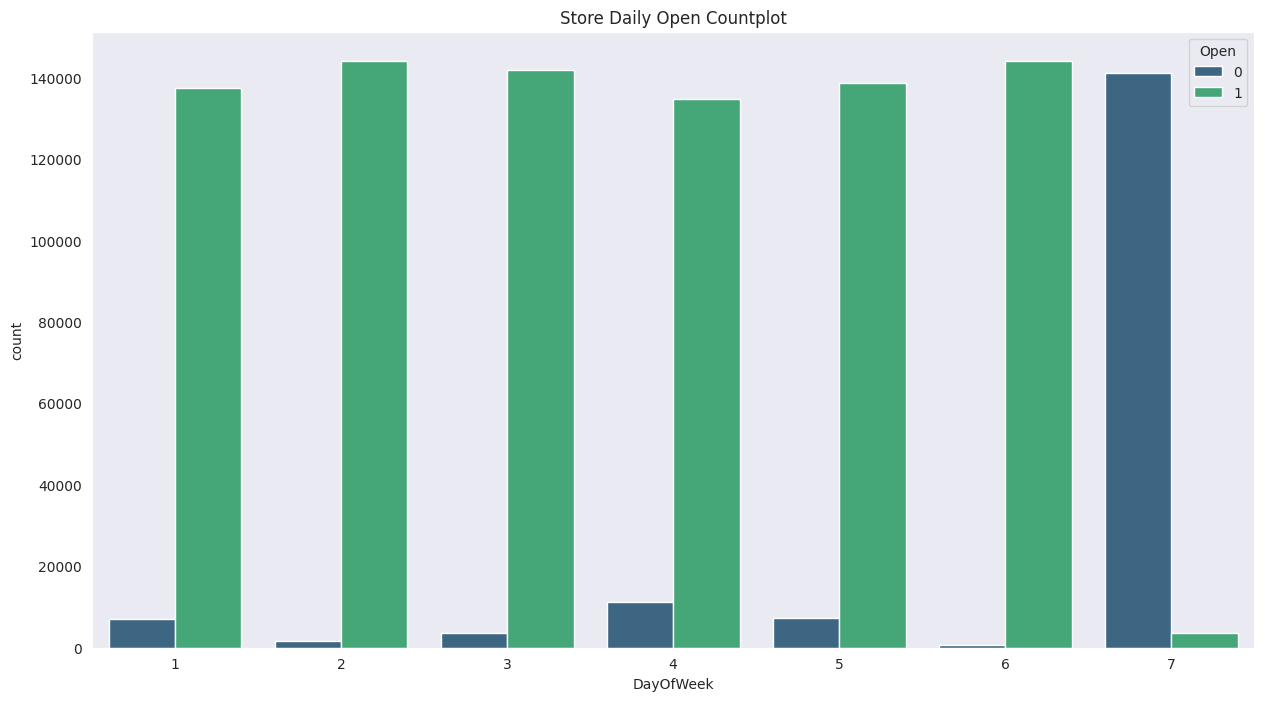

In [50]:
plt.figure(figsize=(15, 8))
sns.countplot(x= 'DayOfWeek', hue='Open', data= final1, palette='viridis')
plt.title('Store Daily Open Countplot')

Text(0.5, 1.0, 'Store Daily Promo Countplot')

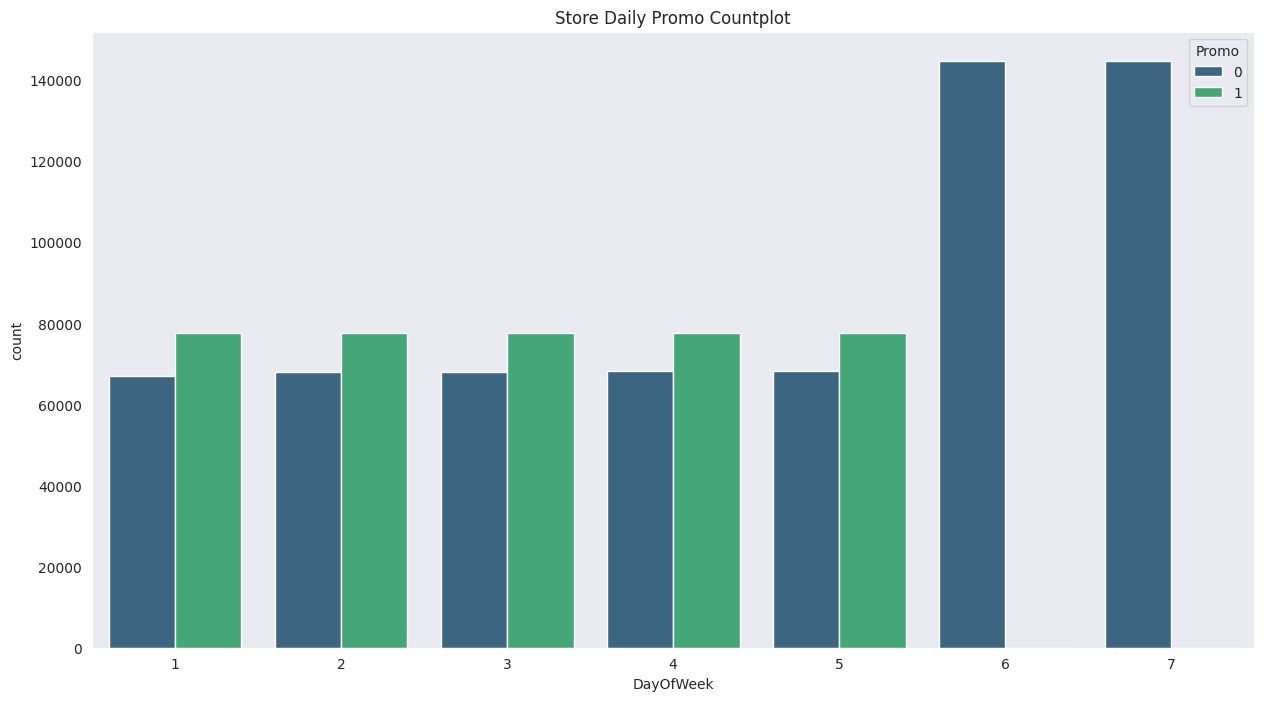

In [51]:
plt.figure(figsize=(15, 8))
sns.countplot(x= 'DayOfWeek', hue='Promo', data= final1, palette='viridis')
plt.title('Store Daily Promo Countplot')

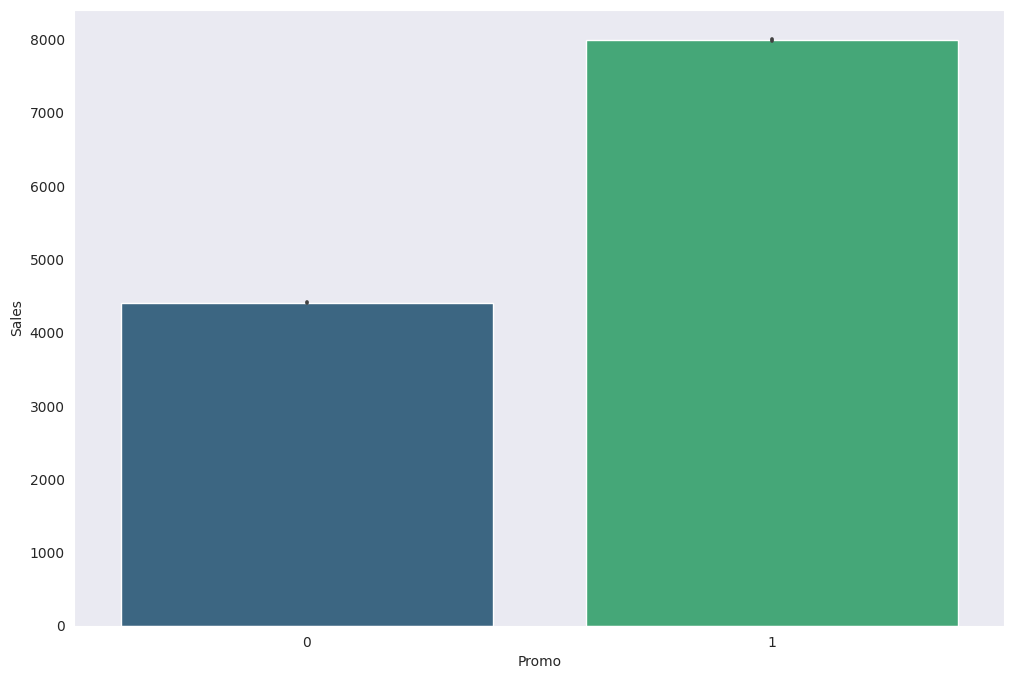

In [52]:
plt.figure(figsize=(12, 8))
promo_sales = sns.barplot(x="Promo", y="Sales", data=final1, palette='viridis')

## **State Holiday**

**0 = public holiday, 1 = Easter holiday, 2 = Christmas, 3 = None**

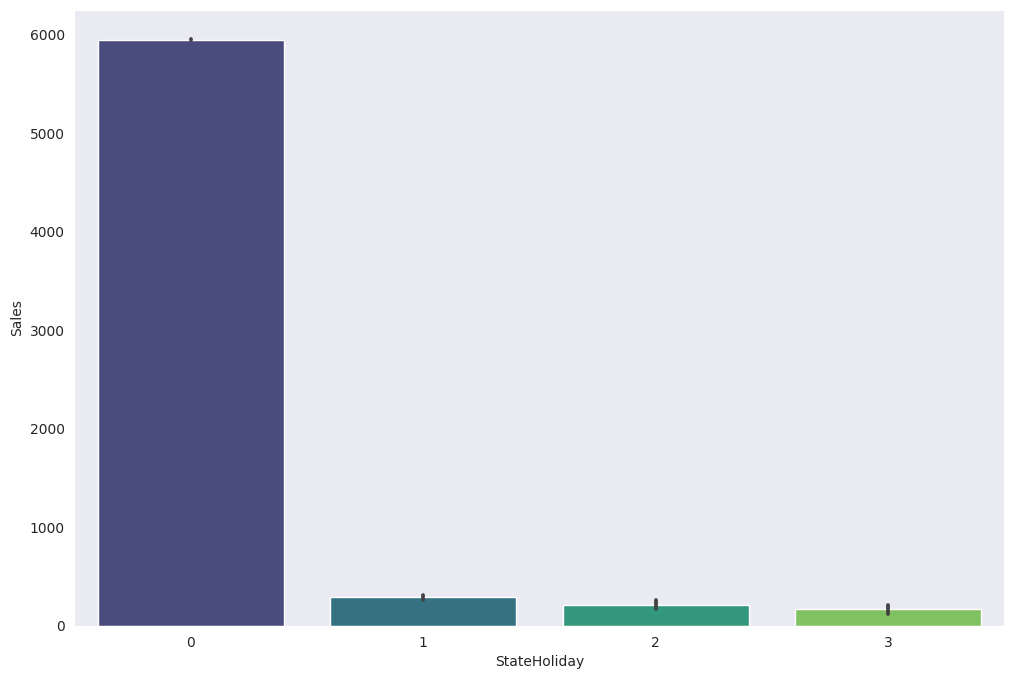

In [53]:
plt.figure(figsize=(12, 8))
stateholiday_sales = sns.barplot(x="StateHoliday", y="Sales", data=final1,palette='viridis')

## **School Holiday**

**0='Not Holiday', 1='Holiday'**

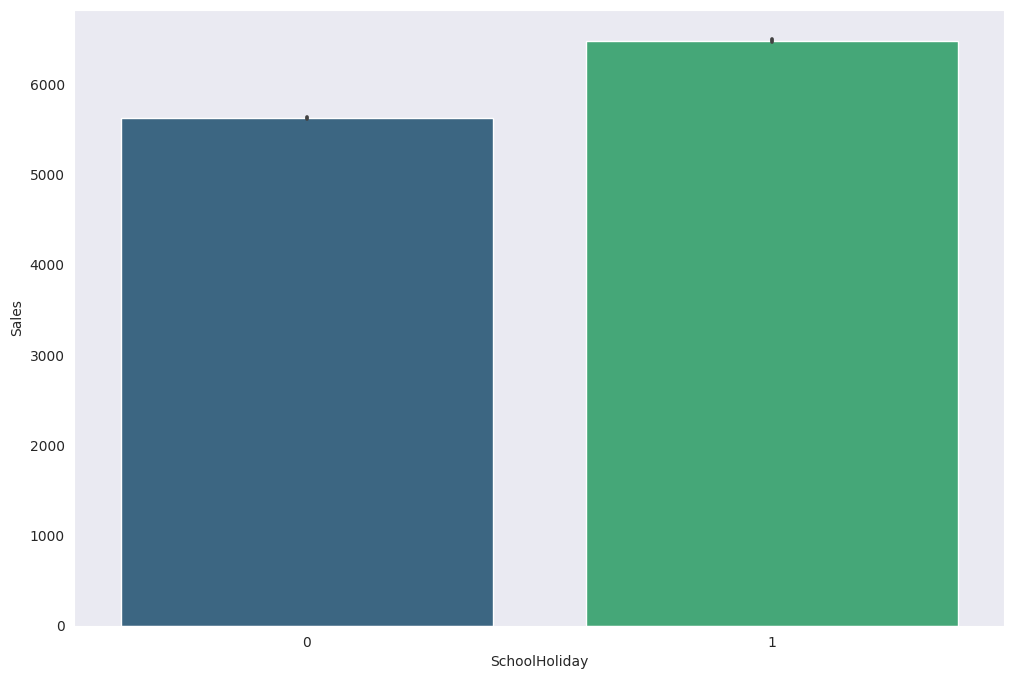

In [54]:
plt.figure(figsize=(12, 8))
stateholiday_sales = sns.barplot(x="SchoolHoliday", y="Sales", data=final1,palette='viridis')

#Step # 5
#**Data Modeling:**

**Feature Engineering**

<ipython-input-55-897b736f3c02>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = final1.corr()


<Axes: >

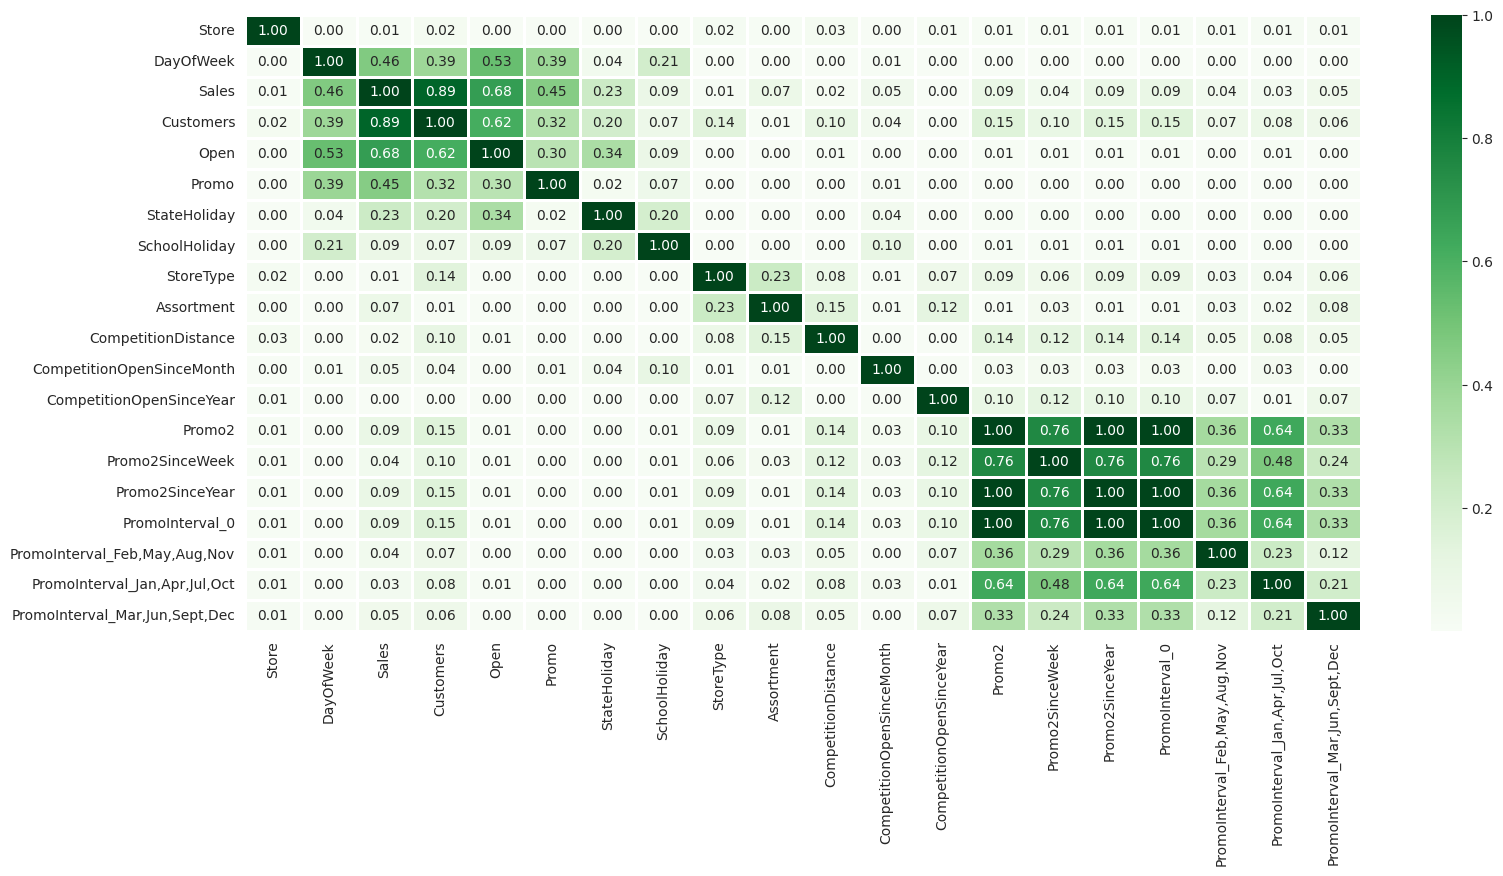

In [55]:
plt.figure(figsize=(18,8))
correlation = final1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='Greens',linewidths=2,fmt=".2f")

**Multicollinearity**\
TO REMOVE OUTLIERS

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [57]:
calc_vif(final1[[i for i in final1.describe().columns if i not in ['Sales']]])

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,Store,1.003299e+00
1,DayOfWeek,1.668024e+00
2,Customers,1.845632e+00
3,Open,2.278144e+00
4,Promo,1.232929e+00
5,StateHoliday,1.280969e+00
6,SchoolHoliday,1.098981e+00
7,StoreType,1.105306e+00
8,Assortment,1.108785e+00
9,CompetitionDistance,1.080765e+00


In [58]:
calc_vif(final1[[i for i in final1.describe().columns if i not in ['Sales','Promo2']]])

,variables,VIF
0,Store,1.003299
1,DayOfWeek,1.668024
2,Customers,1.845632
3,Open,2.278144
4,Promo,1.232929
5,StateHoliday,1.280969
6,SchoolHoliday,1.098981
7,StoreType,1.105306
8,Assortment,1.108785
9,CompetitionDistance,1.080765


**"VISUALIZE DEPENDENT VARIABLE SALES"**

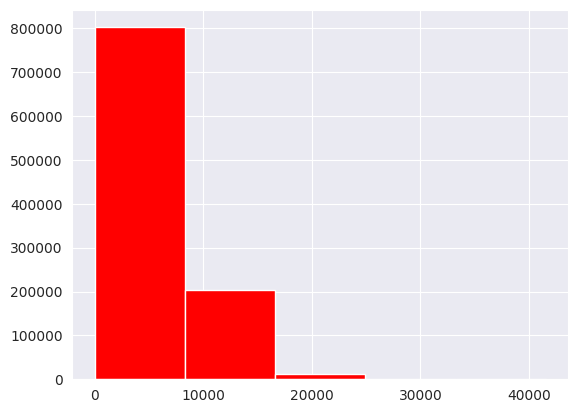

In [59]:
pd.Series(final1['Sales'],).hist(bins=5, color="red")
plt.show()

In [60]:
final1[(final1.Open == 0) & (final1.Sales == 0)].count()[0]

172817

In [61]:
new_df = final1.drop(final1[(final1.Open == 0) & (final1.Sales == 0)].index)

In [62]:
new_df.shape

(844392, 21)

In [63]:
new_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,1270,7,2008,0,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,570,7,2007,1,13,2010,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14130,7,2006,1,14,2011,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,620,7,2009,0,0,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,29910,7,2015,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,1,1,1,...,150,1,2006,0,0,0,1,0,0,0
1016827,733,2,2013-01-01,10765,2377,1,0,1,1,1,...,860,1,1999,0,0,0,1,0,0,0
1016863,769,2,2013-01-01,5035,1248,1,0,1,1,1,...,840,1,0,1,48,2012,0,0,1,0
1017042,948,2,2013-01-01,4491,1039,1,0,1,1,1,...,1430,1,0,0,0,0,1,0,0,0


#**Apply LinearRegression To Train And Predict the Model**


**we are excluding sales=0 in dataset consider that 0 sales store are closed**

In [64]:
# defining dependent variable
dependent_variables = 'Sales' #y

# defining independent variable X
independent_variables = list(new_df.columns.drop(['Promo2SinceYear','Date','Sales']))

In [65]:
#List of Independent Variable
independent_variables


['Store',
 'DayOfWeek',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'PromoInterval_0',
 'PromoInterval_Feb,May,Aug,Nov',
 'PromoInterval_Jan,Apr,Jul,Oct',
 'PromoInterval_Mar,Jun,Sept,Dec']

In [66]:
# Create the data of independent variables
X = new_df[independent_variables].values

# Create the data of dependent variable
y = new_df[dependent_variables].values

In [67]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(675513, 18)
(168879, 18)


In [68]:
# Here we Train the model
reg = LinearRegression().fit(X_train, y_train)

In [69]:
#Checking the Regression Score i.e R-squared value
reg.score(X_train, y_train)

0.7635183725690666

In [70]:
# Checking the cofficient of different independent columns
reg.coef_

array([-1.61160602e-01, -6.85548194e+01,  6.35504984e+00, -6.79767354e-12,
        1.29645838e+03, -1.28102415e+03,  3.62329515e+01,  2.76744096e+02,
        2.22217335e+02,  2.88849353e-02,  2.99491278e+01,  8.39884213e-02,
       -4.31860944e+01,  1.24902145e+01,  4.31860944e+01,  3.16962854e+01,
        1.38838509e+02, -2.13720889e+02])

In [71]:
# Checking the intercept of different indpendent columns
reg.intercept_

700.1749140828606

In [72]:
#Predicting Dependent Variable With Test Dataset i.e 20%
y_pred = reg.predict(X_test)
y_pred

array([5324.59975349, 4849.47506442, 7238.44230268, ..., 4098.19887156,
       7772.83233987, 5368.22125565])

In [73]:
# Original Test Dependent Value
y_test

array([ 5495,  5472,  7969, ...,  2938, 10413,  5828])

In [74]:
#Predicting on Train Dataset
y_pred_train = reg.predict(X_train)
y_pred_train


array([5490.61068489, 6804.3787408 , 6699.04311466, ..., 7913.72781806,
       6884.64407492, 6123.05554455])

In [75]:
# Dependent Variable With Train Dataset i.e 80 %
y_train

array([5409, 7339, 7807, ..., 4817, 6194, 5862])

#Step # 6
#**Presentation and Automation**

In [76]:
#Calculate MSE & RMSE for Test Prediction
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 2265528.631712661
RMSE : 1505.1673102059656


In [77]:
r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)

R2 : 0.7634783399226589


In [78]:
pd.DataFrame(zip(y_test, y_pred), columns = ['actual', 'pred'])

,actual,pred
0,5495,5324.599753
1,5472,4849.475064
2,7969,7238.442303
3,7384,6085.227240
4,13212,7829.105207
...,...,...
168874,16337,16398.115914
168875,9195,7062.744213
168876,2938,4098.198872
168877,10413,7772.832340


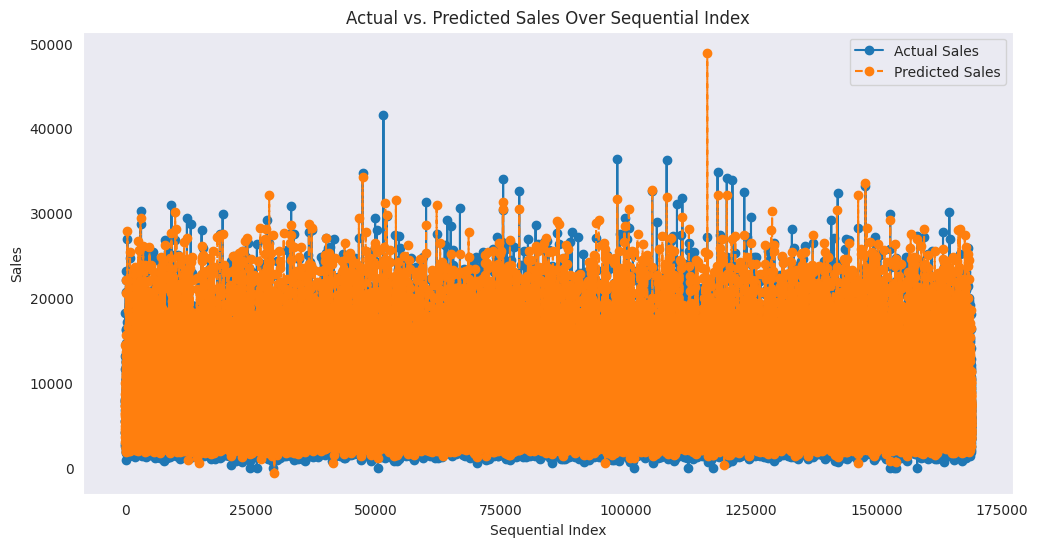

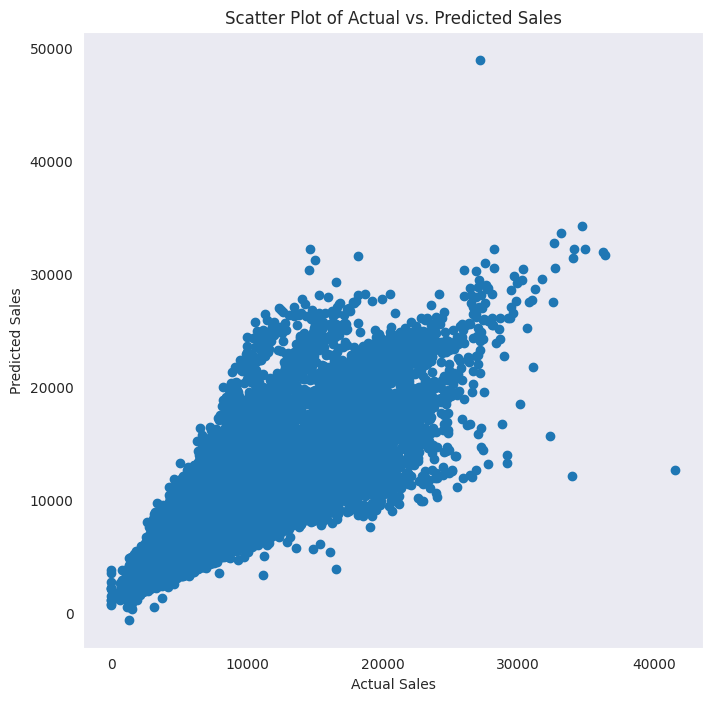

In [79]:
df_result = pd.DataFrame({
    'Actual_Sales': y_test,
    'Predicted_Sales': y_pred
})

# Create a sequential index as a substitute for time
sequential_index = np.arange(len(df_result))

# Time Series Plot with Sequential Index
plt.figure(figsize=(12, 6))
plt.plot(sequential_index, df_result['Actual_Sales'], label='Actual Sales', marker='o')
plt.plot(sequential_index, df_result['Predicted_Sales'], label='Predicted Sales', linestyle='dashed', marker='o')
plt.title('Actual vs. Predicted Sales Over Sequential Index')
plt.xlabel('Sequential Index')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Scatter Plot
plt.figure(figsize=(8, 8))
plt.scatter(df_result['Actual_Sales'], df_result['Predicted_Sales'])
plt.title('Scatter Plot of Actual vs. Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()
